**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [6]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [12]:
# Load Data
file_path = './GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [14]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [17]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [19]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [21]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [24]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [27]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20

5/5 [==============================] - 5s 28ms/step - loss: 0.4139
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 0.1708
Epoch 3/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1357
Epoch 4/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1346
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1157
Epoch 6/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1145
Epoch 7/20
5/5 [==============================] - 0s 28ms/step - loss: 0.1060
Epoch 8/20
5/5 [==============================] - 0s 27ms/step - loss: 0.1059
Epoch 9/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0919
Epoch 10/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0990
Epoch 11/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0881
Epoch 12/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0957
Epoch 13/20
5/5 [==============================] - 0s 29ms/s

In [28]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 8ms/step


In [29]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

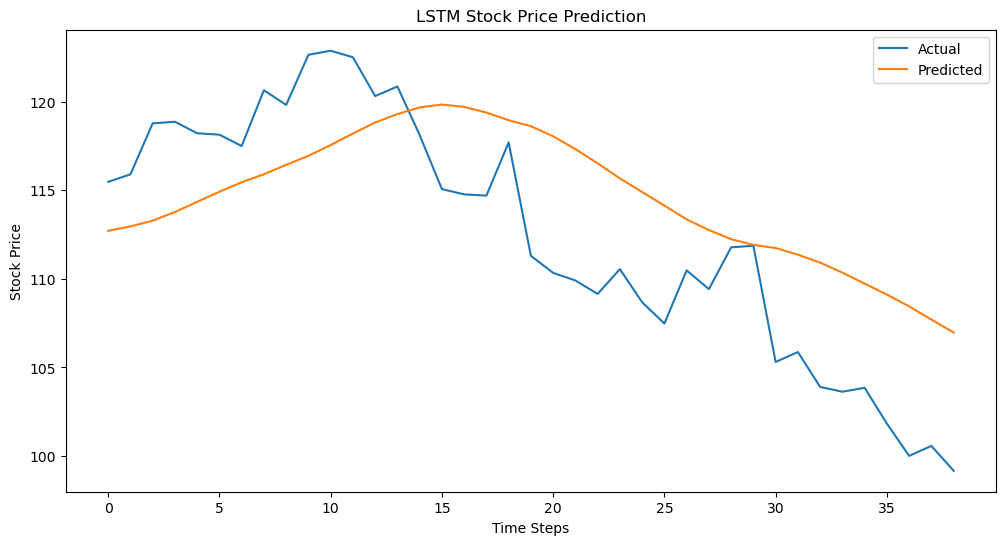

In [31]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


# answers

### find hyper parameters

6/6 [==============================] - 6s 43ms/step


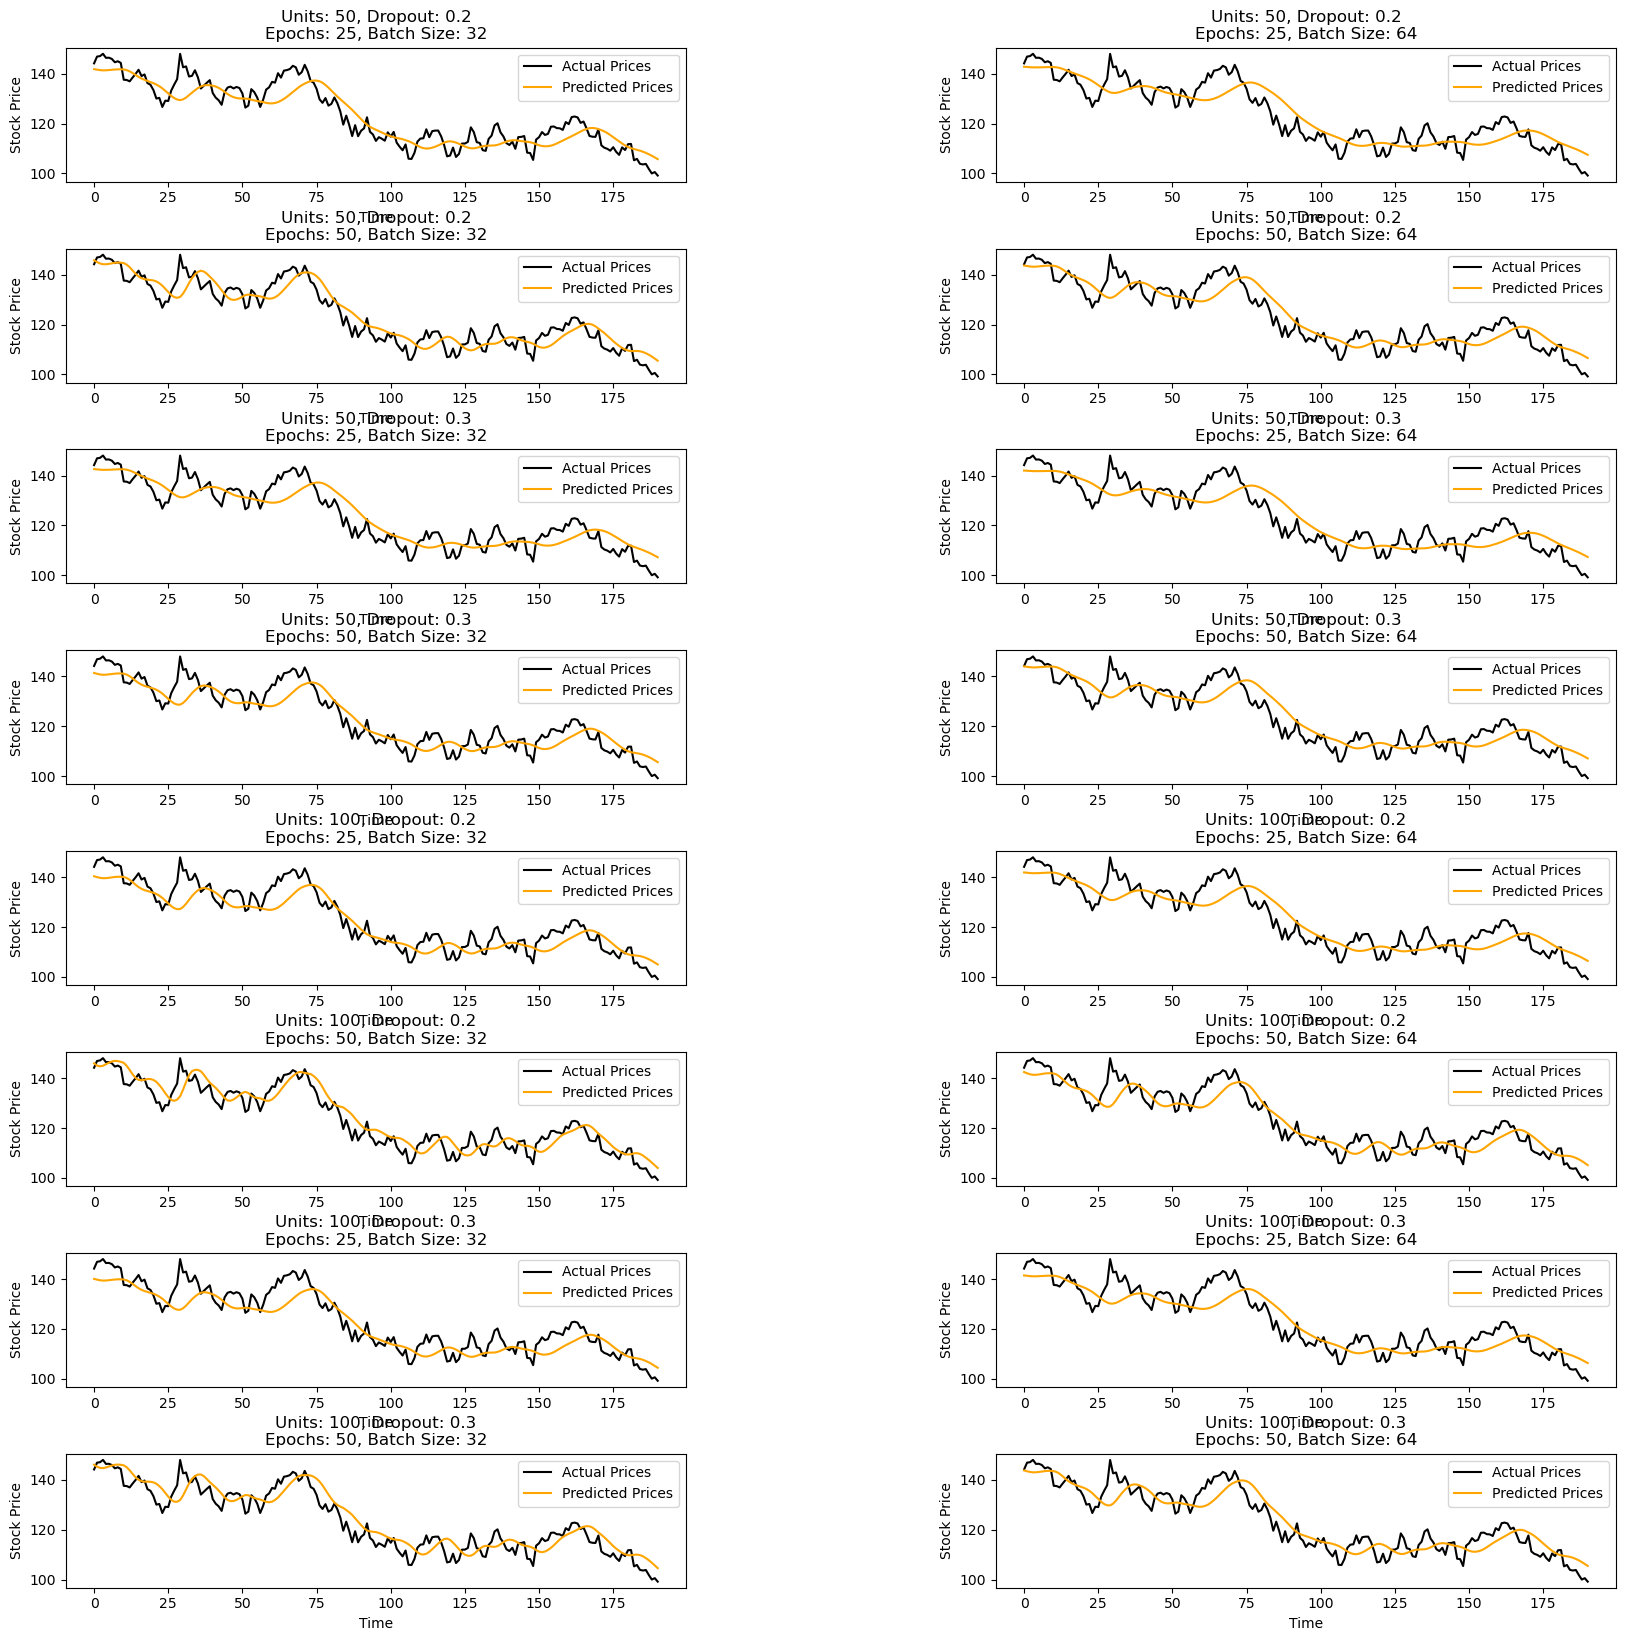

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('GOOG.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Prepare the training data
prediction_days = 60
x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Hyperparameter tuning configurations
units_list = [50, 100]
dropout_rates = [0.2, 0.3]
epochs_list = [25, 50]
batch_sizes = [32, 64]

# Plot settings
total_plots = len(units_list) * len(dropout_rates) * len(epochs_list) * len(batch_sizes)
cols = len(batch_sizes)
rows = total_plots // cols
if total_plots % cols != 0:
    rows += 1

fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Function to build LSTM model
def build_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Track subplot index
idx = 0

for units in units_list:
    for dropout_rate in dropout_rates:
        for epochs in epochs_list:
            for batch_size in batch_sizes:
                # Build and train the model
                model = build_model(units, dropout_rate)
                model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Test the model accuracy on existing data
                model_inputs = df['Close'].values
                model_inputs = model_inputs.reshape(-1, 1)
                model_inputs = scaler.transform(model_inputs)

                x_test = []
                for i in range(prediction_days, len(model_inputs)):
                    x_test.append(model_inputs[i-prediction_days:i, 0])

                x_test = np.array(x_test)
                x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

                predicted_prices = model.predict(x_test)
                predicted_prices = scaler.inverse_transform(predicted_prices)

                # Plot the results
                ax = axs[idx // cols, idx % cols]
                ax.plot(df['Close'][-len(predicted_prices):].values, color='black', label='Actual Prices')
                ax.plot(predicted_prices, color='orange', label='Predicted Prices')
                ax.set_title(f'Units: {units}, Dropout: {dropout_rate}\nEpochs: {epochs}, Batch Size: {batch_size}')
                ax.set_xlabel('Time')
                ax.set_ylabel('Stock Price')
                ax.legend()

                idx += 1

plt.show()

#### best hyper parameters

### Best Hyperparameters for Model Training

**Units:** 100

**Dropout Rates:** 0.5

**Epochs List:** 50

**Batch Sizes:** 32 32

### Answers:

1. **What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?**

   Normalizing the 'Close' prices before feeding them into the LSTM model helps to scale the data to a standard range, often between 0 and 1. This is important because it helps the model to converge faster and more efficiently during training by reducing the variability in the input data. Additionally, normalized data is less likely to suffer from issues related to different data scales, which can adversely affect model performance.

2. **What is the purpose of the Dropout layer in the LSTM model?**

   The Dropout layer serves as a regularization technique to prevent overfitting in the LSTM model. During training, a Dropout layer randomly sets a fraction of input units to zero at each update, which discourages the model from relying too heavily on particular nodes and helps it to generalize better on the test data. This ensures the model can perform well on unseen data.

3. **In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?**

   If the predicted line closely follows the actual line in the plot, it indicates that the LSTM model has successfully learned the underlying patterns and trends in the historical stock price data. This suggests that the model has a good predictive performance and can effectively approximate the actual stock prices, thereby producing accurate predictions.